<a href="https://colab.research.google.com/github/Stiven2308/Challenge1_Alura/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [18]:
datos = pd.concat([tienda, tienda2, tienda3, tienda4])
datos.reset_index(drop=True, inplace=True)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  Facturación             9435 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 958.4+ KB


#1. Análisis de facturación



In [19]:
#facturación para cada tienda
tienda["Facturación"] = tienda["Precio"] + tienda["Costo de envío"]
tienda2["Facturación"] = tienda2["Precio"] + tienda2["Costo de envío"]
tienda3["Facturación"] = tienda3["Precio"] + tienda3["Costo de envío"]
tienda4["Facturación"] = tienda4["Precio"] + tienda4["Costo de envío"]
fact_tienda1 = tienda["Facturación"].sum()
fact_tienda2 = tienda2["Facturación"].sum()
fact_tienda3 = tienda3["Facturación"].sum()
fact_tienda4 = tienda4["Facturación"].sum()
facturacion_total = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Facturación Total": [fact_tienda1, fact_tienda2, fact_tienda3, fact_tienda4]})
facturacion_total

,Tienda,Facturación Total
0,Tienda 1,1.212258e+09
1,Tienda 2,1.175829e+09
2,Tienda 3,1.156536e+09
3,Tienda 4,1.093693e+09


# 2. Ventas por categoría

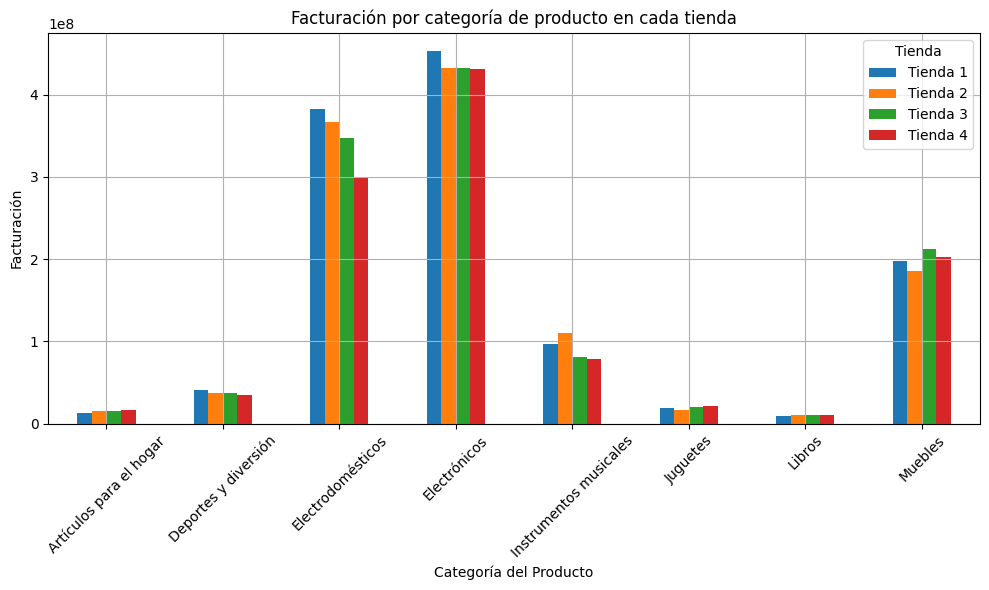

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Artículos para el hogar,13342200.0,15547700.0,15872400.0,15928600.0
Deportes y diversión,41411100.0,36621800.0,37516200.0,35120200.0
Electrodomésticos,383009200.0,367123400.0,346732100.0,298282700.0
Electrónicos,452457200.0,432645300.0,432631700.0,431304400.0
Instrumentos musicales,96182900.0,110548000.0,81489700.0,79056300.0
Juguetes,18975200.0,16833000.0,20442800.0,21374700.0
Libros,9251900.0,10647000.0,9995100.0,9862000.0
Muebles,197628600.0,185862400.0,211856200.0,202764200.0


In [27]:
ventas_cat_1 = tienda.groupby("Categoría del Producto")["Facturación"].sum()
ventas_cat_2 = tienda2.groupby("Categoría del Producto")["Facturación"].sum()
ventas_cat_3 = tienda3.groupby("Categoría del Producto")["Facturación"].sum()
ventas_cat_4 = tienda4.groupby("Categoría del Producto")["Facturación"].sum()
ventas_categorias = pd.DataFrame({
    "Tienda 1": ventas_cat_1,
    "Tienda 2": ventas_cat_2,
    "Tienda 3": ventas_cat_3,
    "Tienda 4": ventas_cat_4
}).fillna(0)
ventas_categorias.plot(kind='bar', figsize=(10,6))
plt.title("Facturación por categoría de producto en cada tienda")
plt.ylabel("Facturación")
plt.xlabel("Categoría del Producto")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Tienda")
plt.tight_layout()
plt.show()
ventas_categorias

# 3. Calificación promedio de la tienda


In [21]:
calif_1 = tienda["Calificación"].mean()
calif_2 = tienda2["Calificación"].mean()
calif_3 = tienda3["Calificación"].mean()
calif_4 = tienda4["Calificación"].mean()
calificaciones = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Calificación Promedio": [calif_1, calif_2, calif_3, calif_4]
})
calificaciones

,Tienda,Calificación Promedio
0,Tienda 1,3.976685
1,Tienda 2,4.037304
2,Tienda 3,4.048326
3,Tienda 4,3.995759


# 4. Productos más y menos vendidos

In [22]:
mas_vendidos_1 = tienda["Producto"].value_counts()
mas_vendidos_2 = tienda2["Producto"].value_counts()
mas_vendidos_3 = tienda3["Producto"].value_counts()
mas_vendidos_4 = tienda4["Producto"].value_counts()

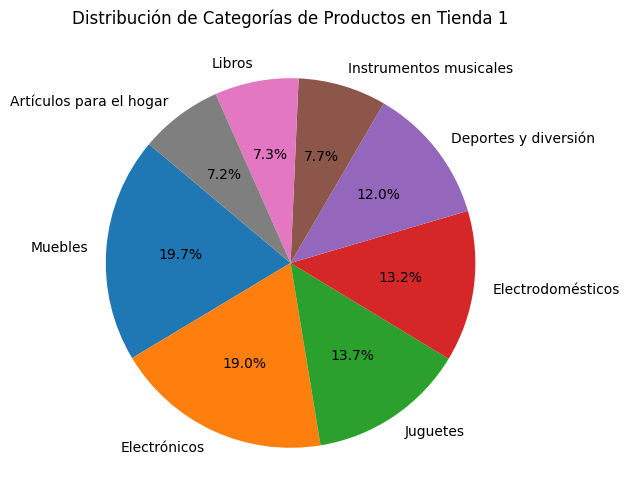

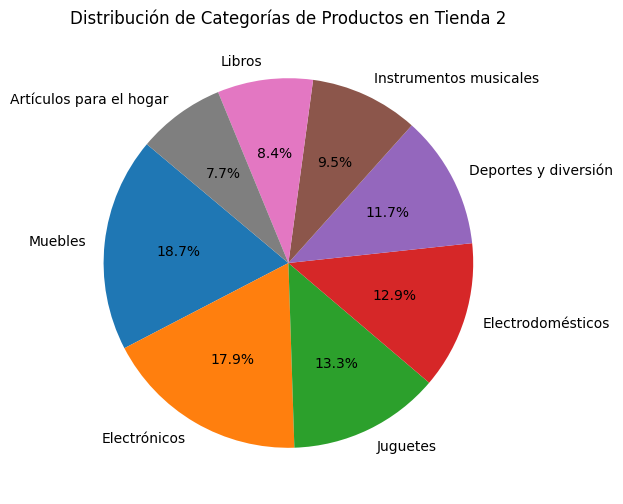

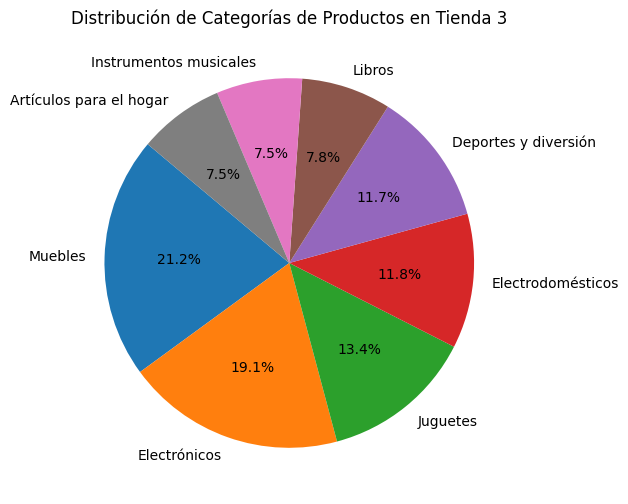

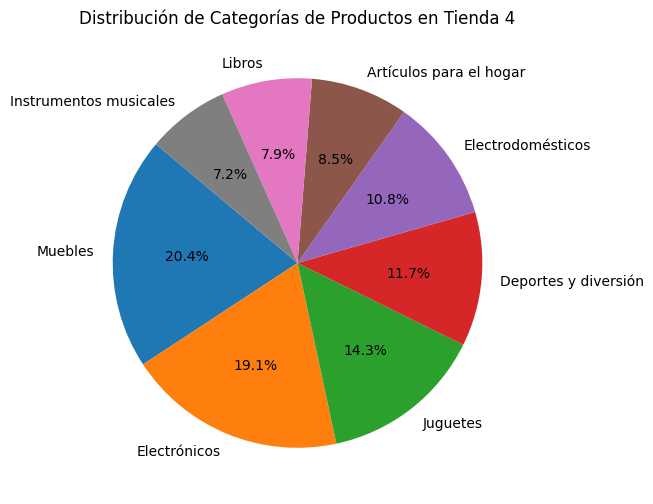

In [31]:
# Tienda 1
producto_max_1 = mas_vendidos_1.idxmax()
cantidad_max_1 = mas_vendidos_1.max()
producto_min_1 = mas_vendidos_1.idxmin()
cantidad_min_1 = mas_vendidos_1.min()

# Tienda 2
producto_max_2 = mas_vendidos_2.idxmax()
cantidad_max_2 = mas_vendidos_2.max()
producto_min_2 = mas_vendidos_2.idxmin()
cantidad_min_2 = mas_vendidos_2.min()

# Tienda 3
producto_max_3 = mas_vendidos_3.idxmax()
cantidad_max_3 = mas_vendidos_3.max()
producto_min_3 = mas_vendidos_3.idxmin()
cantidad_min_3 = mas_vendidos_3.min()

# Tienda 4
producto_max_4 = mas_vendidos_4.idxmax()
cantidad_max_4 = mas_vendidos_4.max()
producto_min_4 = mas_vendidos_4.idxmin()
cantidad_min_4 = mas_vendidos_4.min()

productos_resumen = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Producto más vendido": [producto_max_1, producto_max_2, producto_max_3, producto_max_4],
    "Ventas (Top)": [cantidad_max_1, cantidad_max_2, cantidad_max_3, cantidad_max_4],
    "Producto menos vendido": [producto_min_1, producto_min_2, producto_min_3, producto_min_4],
    "Ventas (menos vendido)": [cantidad_min_1, cantidad_min_2, cantidad_min_3, cantidad_min_4]
})
productos_resumen

def plot_distribucion_categorias(tienda, tienda_nombre):
    categoria_counts = tienda['Categoría del Producto'].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(categoria_counts, labels=categoria_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribución de Categorías de Productos en {tienda_nombre}')
    plt.show()

plot_distribucion_categorias(tienda, "Tienda 1")
plot_distribucion_categorias(tienda2, "Tienda 2")
plot_distribucion_categorias(tienda3, "Tienda 3")
plot_distribucion_categorias(tienda4, "Tienda 4")

# 5. Envío promedio por tienda

In [25]:
envio_1 = tienda["Costo de envío"].mean()
envio_2 = tienda2["Costo de envío"].mean()
envio_3 = tienda3["Costo de envío"].mean()
envio_4 = tienda4["Costo de envío"].mean()

In [26]:
envios_promedio = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Envío Promedio": [envio_1, envio_2, envio_3, envio_4]
})

envios_promedio

,Tienda,Envío Promedio
0,Tienda 1,26018.609580
1,Tienda 2,25216.235693
2,Tienda 3,24805.680373
3,Tienda 4,23459.457167
